## AdaBoost algorithm from scratch

In [175]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

### 1. Data Preparation


In [176]:
df = pd.DataFrame()

In [177]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [178]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


- 2 input columns
- one output
- classification problem

### Visualizing dataset

<Axes: xlabel='X1', ylabel='X2'>

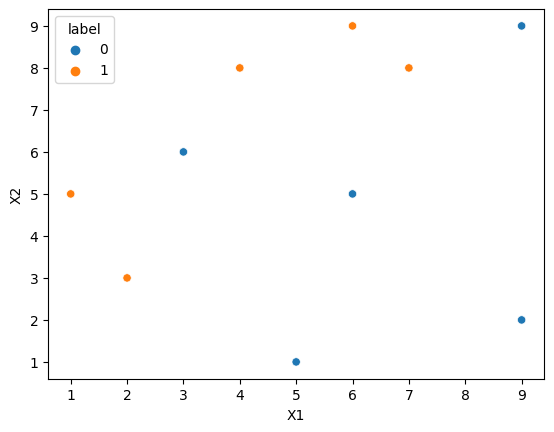

In [179]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

### Building Algorithm from Scratch

#### AdaBoost Algorithm

1. **Assigning Weights to Each Row**

   - **Initial Weights**: At the start, each row is assigned an equal weight.
   - **Weight Calculation**: Weights are calculated as Weight = 1 / Total Number of Rows

2. **Example Calculation**

   - **Total Number of Rows**: 10
   - **Initial Weight for Each Row**: 
Weight = 1 / Total Number of Rows = 1 / 10 = 0.1




In [180]:
df['weights'] = 1/df.shape[0]


In [181]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


### Creating Decision Tree Classifier

- **Set Max Depth to 1**: 
  - In AdaBoost, the decision tree used is a decision stump, which is a weak learner. 
  - Setting `max_depth=1` ensures that the tree has only one level, making it a decision stump.


In [182]:
from sklearn.tree import DecisionTreeClassifier


In [183]:
dt1 = DecisionTreeClassifier(max_depth=1)


In [184]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

### 3. Train the First Decision Tree (Decision Stump)



In [185]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

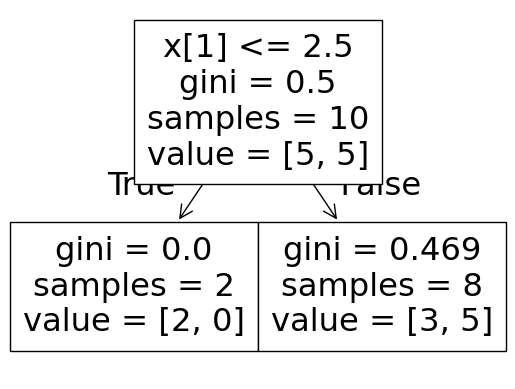

In [186]:
from sklearn.tree import plot_tree
plot_tree(dt1)

- so above is the decision stump 
- which is being made on x[1] column i.e second column

<Axes: >

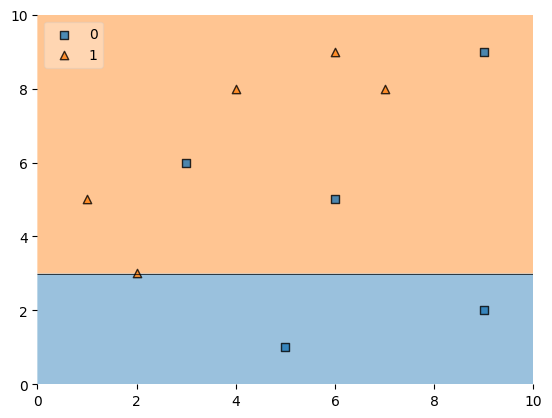

In [187]:
plot_decision_regions(X, y, clf=dt1, legend=2)


### Decision Boundary and Misclassification

- **Decision Boundary**:
  - The decision boundary is visualized for the classifier's predictions.

- **Misclassifications**:
  - The classifier made 3 mistakes, which are indicated by blue points that lie within the red region.
  - These errors show where the decision boundary did not correctly separate the classes.

- **Analyzing Predictions**:
  - Next, we will examine the predictions based on the training data.
  - We will identify and display the mistakes made by the classifier in the DataFrame.


In [188]:
df['y_pred'] = dt1.predict(X)


In [189]:
df


,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


### Calculating Weightage for the Decision Stump

- **Decision Stump Weightage**:
  - After training the decision stump, we calculate its weightage.
  
- **Error Calculation**:
  - The error is computed as the sum of all weights where misclassification occurs.
  - This helps in determining how much weight should be assigned to the decision stump in the boosting process.


In [190]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))


### Step 3 - calculate model weight


In [191]:
alpha1 = calculate_model_weight(0.3) # 0.3 is the error which is summ of all misclassified rows weight
alpha1

0.42364893019360184

### Calculating Alpha for the First Model

- We have calculated alpha_1 for our first model.
- Alpha_1 represents the weight of the first model in the AdaBoost algorithm.
- It indicates how much the first model contributes to the final prediction.


### Step 4 - Update Weights

- **Update Weights:** Adjust the weights of the rows based on whether they were correctly or incorrectly classified:
  - Increase the weight for misclassified rows.
  - Decrease the weight for correctly classified rows.

#### Understanding Weight Update

- **For Misclassified Rows:**
  - New Weight = Old Weight * e^α
  - When α (alpha) is high, it means the model had fewer misclassifications, so the weight for these rows increases.

- **For Correctly Classified Rows:**
  - New Weight = Old Weight * e^(-α)
  - When α (alpha) is high, it indicates a trustworthy model, so the weight for these rows decreases.


In [192]:
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [193]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)


In [194]:
df


,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


- **Misclassified Rows:** If we look at the rows that were misclassified, their weights are increased.

- **Sum of Weights:** After updating the weights, the sum of all weights might not equal 1.

- **Normalization:** To ensure the sum of weights is 1, we need to normalize the weights:
  - **Normalization Process:** Divide each updated weight by the total sum of the updated weights.
  - This makes sure that the weights sum up to 1, which is necessary for the algorithm to work properly.


In [195]:
df['updated_weights'].sum()


0.9165153319682015

In [196]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()


In [197]:
df


,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [198]:
df['nomalized_weights'].sum()


1.0

- **Sum is 1 Now:** After normalization, the sum of all weights is now 1.

### **Creating the Range:**
  - With the weights normalized, the next step is to create a range based on these weights.
  - This range will help in making predictions and further steps in the algorithm.


In [199]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])


In [200]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']


In [201]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]


,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


### Creating a New Dataset

#### Upsampling

To perform upsampling, follow these steps:

1. **Generate Random Numbers:**
   - Generate a set of random numbers, for example, 10 random numbers.

2. **Check the Range:**
   - For each random number, check which weight range it falls into based on the normalized weights.

3. **Pick the Row:**
   - Depending on the range in which the random number falls, select the corresponding row from the original dataset.
   - This process effectively replicates rows according to their weights, increasing the representation of rows with higher weights.

This method helps in creating a balanced dataset by increasing the number of samples from rows that are more significant based on the model's performance.


In [202]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [203]:
index_values = create_new_dataset(df)

index_values

[2, 9, 5, 8, 6, 9, 1, 1, 8, 8]

- Rows that were misclassified by the model have had their weights increased. 
- As a result, these rows now have a higher chance of being selected in the new dataset because their weight ranges are larger.
- Consequently, during upsampling, rows that previously made mistakes are more likely to be included, which helps the model focus more on improving the classification of these challenging cases.


In [204]:
second_df = df.iloc[index_values,[0,1,2,3]]
# taking only 0,1,2,3 columns

In [205]:
second_df


,X1,X2,label,weights
2,3,6,0,0.1
9,9,2,0,0.1
5,6,9,1,0.1
8,9,9,0,0.1
6,6,5,0,0.1
9,9,2,0,0.1
1,2,3,1,0.1
1,2,3,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1


- After creating the new dataset and upsampling, we will proceed to the next stage.
- Weights will be reinitialized to 0.1 for the new dataset.
- With the updated weights and the new dataset, we will train a second decision tree.


In [206]:
dt2 = DecisionTreeClassifier(max_depth=1)


In [207]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [208]:
dt2.fit(X,y)


DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.625, 0.5, '  False')]

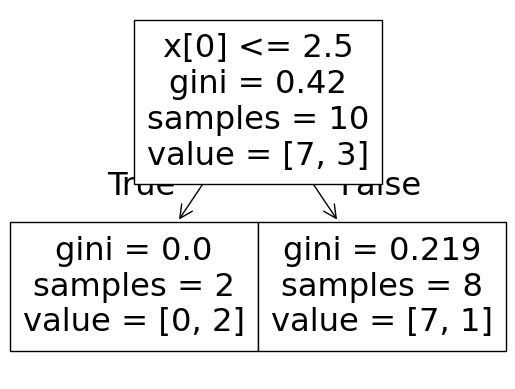

In [209]:
plot_tree(dt2)


- this decison tree is trained on 1st column

<Axes: >

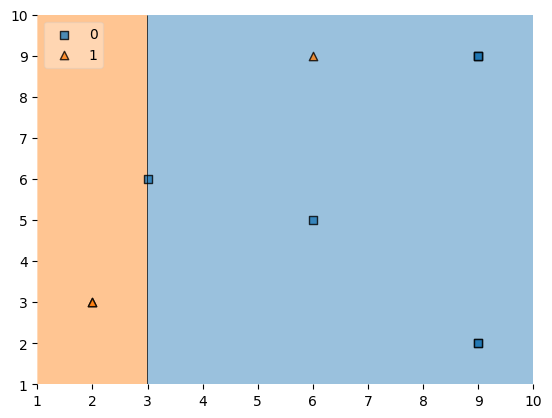

In [210]:
plot_decision_regions(X, y, clf=dt2, legend=2)


- only 1 misclassification on red ppoint

In [211]:
second_df['y_pred'] = dt2.predict(X)


In [212]:
second_df


,X1,X2,label,weights,y_pred
2,3,6,0,0.1,0
9,9,2,0,0.1,0
5,6,9,1,0.1,0
8,9,9,0,0.1,0
6,6,5,0,0.1,0
9,9,2,0,0.1,0
1,2,3,1,0.1,1
1,2,3,1,0.1,1
8,9,9,0,0.1,0
8,9,9,0,0.1,0


- calculating alpha2 for second decision tyree

In [213]:
alpha2 = calculate_model_weight(0.1)


In [214]:
alpha2


1.0986122886681098

- the weight of alpha 2 is more  thane alpha 1 since it made less mistake so alpha 1 has more say in final algorithm prediction
- again will update our weights

In [215]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [216]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)


In [217]:
second_df


,X1,X2,label,weights,y_pred,updated_weights
2,3,6,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622
5,6,9,1,0.1,0,0.297427
8,9,9,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622
1,2,3,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622


In [218]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()


In [219]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
2,3,6,0,0.1,0,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
5,6,9,1,0.1,0,0.297427,0.495694
8,9,9,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
1,2,3,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034


- if we see the 2 rows which are misclasified theier weights are increased

In [220]:
second_df['nomalized_weights'].sum()


0.9999999999999999

In [221]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])


In [222]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']


In [223]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]


,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
2,3,6,0,0.1,0,0.056034,0.000000,0.056034
9,9,2,0,0.1,0,0.056034,0.056034,0.112068
5,6,9,1,0.1,0,0.495694,0.112068,0.607762
8,9,9,0,0.1,0,0.056034,0.607762,0.663796
6,6,5,0,0.1,0,0.056034,0.663796,0.719830
9,9,2,0,0.1,0,0.056034,0.719830,0.775864
1,2,3,1,0.1,1,0.056034,0.775864,0.831898
1,2,3,1,0.1,1,0.056034,0.831898,0.887932
8,9,9,0,0.1,0,0.056034,0.887932,0.943966
8,9,9,0,0.1,0,0.056034,0.943966,1.000000


In [224]:
index_values = create_new_dataset(second_df)


In [225]:
third_df = second_df.iloc[index_values,[0,1,2,3]]


In [226]:
third_df


,X1,X2,label,weights
9,9,2,0,0.1
1,2,3,1,0.1
9,9,2,0,0.1
9,9,2,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1


In [227]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

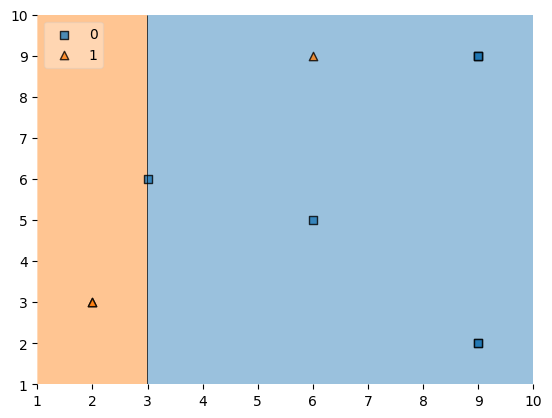

In [228]:
plot_decision_regions(X, y, clf=dt3, legend=2)


In [229]:
third_df['y_pred'] = dt3.predict(X)


In [230]:
third_df


,X1,X2,label,weights,y_pred
9,9,2,0,0.1,0
1,2,3,1,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,1
9,9,2,0,0.1,1
9,9,2,0,0.1,0
9,9,2,0,0.1,0


- it is doing 3 misclassification inn this case


In [231]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [232]:
print(alpha1,alpha2,alpha3)


0.42364893019360184 1.0986122886681098 -0.4236489301936017


### Prediction

- Let's consider a single row with a prediction of 1.
- We will check if our model correctly classifies this row.


In [233]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)


array([1], dtype=int64)

In [234]:
dt2.predict(query)


array([1], dtype=int64)

In [235]:
dt3.predict(query)


array([1], dtype=int64)

- All three decision trees predicted 1 for the row.
- We will calculate the final prediction by using the formula for combining model predictions.


In [236]:
alpha1*1 + alpha2*(1) + alpha3*(1)


1.09861228866811

In [237]:
np.sign(1.09)


1.0

- The final output prediction is 1, which matches the value in the dataset.


In [238]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [239]:
dt2.predict(query)


array([0], dtype=int64)

In [240]:
dt3.predict(query)


array([0], dtype=int64)

In [244]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)
# in case of boosting 0 is considered as -1

-0.2513144282809062

In [245]:
np.sign(-0.25)


-1.0

- The final output prediction is 0, which matches the value in the dataset.


## AdaBoost Algorithm Implementation from Scratch

In [296]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import warnings

warnings.filterwarnings('ignore')

# Step 2: Define the AdaBooster Class
class AdaBooster:
    def __init__(self, num_iter):
        self.num_iter = num_iter
        self.stumps = []
        self.train_error = []
        self.alpha_list = []

    # Step 3: Define the Error Calculation Method
    def __calculate_error(self, y, y_pred, w):
        err = np.sum(w * (y != y_pred)) / np.sum(w)
        return err

    # Step 4: Define the Weight Update Method
    def __update_weights(self, alpha, w, y, y_pred):
        # Update weights based on classification error
        w = w * np.exp(alpha * (y != y_pred)) 
        return w

    # Step 5: Define the Alpha Calculation Method
    def __calculate_alpha(self, err):
        # Calculate alpha for the model
        return 0.5 * np.log((1 - err) / err)

    # Step 6: Define the Fit Method
    def fit(self, X, y):
        w = np.ones(len(y)) / len(y)  # Initialize weights
        for i in range(self.num_iter):
            base_clf = DecisionTreeClassifier(max_depth=1)
            base_clf.fit(X, y, sample_weight=w)
            y_pred = base_clf.predict(X)
            self.stumps.append(base_clf)
            err = self.__calculate_error(y, y_pred, w)
            alpha = self.__calculate_alpha(err)
            self.alpha_list.append(alpha)

            # Update weights
            w = self.__update_weights(alpha, w, y, y_pred)

            self.train_error.append(err)

            if i % 100 == 0:
                print(f"{i}th iteration; error: {err}")
        return True

    # Step 7: Define the Predict Method
    def predict(self, X):
        df_weak = pd.DataFrame(index=range(len(X)), columns=range(self.num_iter))
        for i in range(self.num_iter):
            y_pred = self.stumps[i].predict(X)
            df_weak.iloc[:, i] = y_pred * self.alpha_list[i]

        y_pred = np.sign(df_weak.T.sum())
        return y_pred.astype(int)
    
    def predict_proba(self, X):
        df_weak = pd.DataFrame(index=range(len(X)), columns=range(self.num_iter))
        for i in range(self.num_iter):
            y_pred_proba = self.stumps[i].predict_proba(X)[:, 1] * self.alpha_list[i]
            df_weak.iloc[:, i] = y_pred_proba

        y_pred_proba = df_weak.T.sum()
        return y_pred_proba


#### Step 8: Generate a Dummy Dataset


In [297]:
def generate_dummy(n):
    n_per_class = int(n / 2)
    X, y = make_gaussian_quantiles(n_samples=n, n_features=2, n_classes=2)
    return X, y * 2 - 1

#### Step 9: Train and Test the Model


In [298]:
X, y = generate_dummy(n=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

A = AdaBooster(400)
A.fit(X_train, y_train)
y_pred = A.predict(X_test)

print('The ROC-AUC:', round(roc_auc_score(y_test, y_pred), 4))

0th iteration; error: 0.3625000000000001
100th iteration; error: 0.42875414458206207
200th iteration; error: 0.4369999676185559
300th iteration; error: 0.39108747815745976
The ROC-AUC: 0.9643


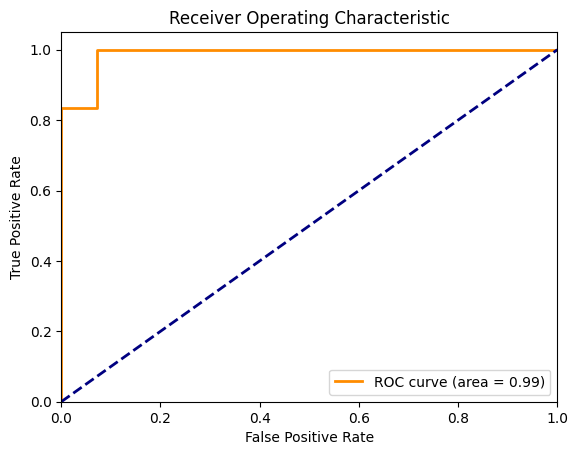

In [299]:
y_pred_proba = A.predict_proba(X_test)  # Ensure this is computed correctly

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()